<a href="https://colab.research.google.com/github/abhinav-syl/Cough-Detection/blob/main/Audio_Recognition_in_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import librosa
import librosa.display
import zipfile
import IPython.display as ipd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
local_zip = "/content/cough.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/cough")
zip_ref.close()

In [ ]:
local_zip = "/content/spec.zip"
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/spec")
zip_ref.close()

In [ ]:
train_cough_dir = os.path.join('/cough/cough/yes')
train_cough_name= os.listdir(train_cough_dir)
print(train_cough_name[:3])
print(len(train_cough_name))
train_ncough_dir = os.path.join('/cough/cough/no')
train_ncough_name= os.listdir(train_ncough_dir)
print(train_ncough_name[:3])
print(len(train_ncough_name))

['0Dh4NhF27jc_ 140.000_ 150.000.wav', '0oUkEze_kmo_ 30.000_ 40.000.wav', '6OatUcXF4nk_ 0.000_ 10.000.wav']
64
['107842-4-0-1.wav', '107842-4-2-2.wav', '105319-3-0-29.wav']
28


In [ ]:
audio  = '/cough/cough/yes/'+train_cough_name[1]
x,sr = librosa.load(audio, sr=44100, duration=2)
print(x,sr)
print(type(x),type(sr))
#librosa.load(audio, sr=44100)

[-0.00116453 -0.00142966 -0.00138386 ... -0.03504354 -0.03181687
 -0.01666462] 44100
<class 'numpy.ndarray'> <class 'int'>


In [ ]:
ipd.Audio(audio)

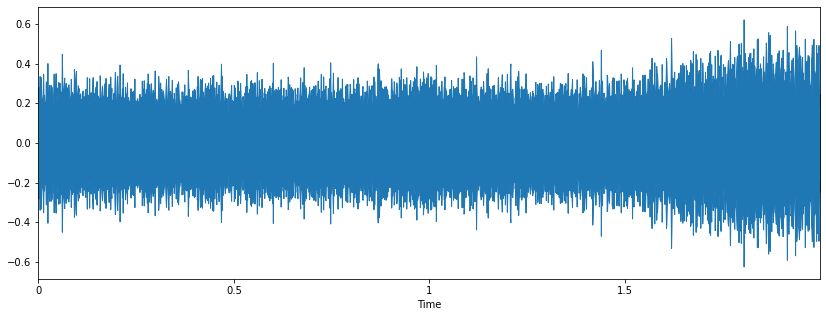

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)


In [ ]:
c_audio=[]
for fname in train_cough_name:
  audio  = '/cough/cough/yes/'+fname
  x,sr = librosa.load(audio,mono=True,duration=2)
  librosa.load(audio, sr=44100)
  c_audio.append(x)
  print(audio)

/cough/cough/yes/0Dh4NhF27jc_ 140.000_ 150.000.wav
/cough/cough/yes/0oUkEze_kmo_ 30.000_ 40.000.wav
/cough/cough/yes/6OatUcXF4nk_ 0.000_ 10.000.wav
/cough/cough/yes/8ieJbzu7ql8_ 20.000_ 30.000.wav
/cough/cough/yes/1_oZWCKCGqA_ 10.000_ 20.000.wav
/cough/cough/yes/6uW93XzK0Xw_ 0.000_ 10.000.wav
/cough/cough/yes/0mZQ6Q-viPw_ 10.000_ 20.000.wav
/cough/cough/yes/_YqaeNeVQbw_ 20.000_ 30.000.wav
/cough/cough/yes/_9YKlnmoDjs_ 11.000_ 21.000.wav
/cough/cough/yes/0EaxcUhZWe8_ 40.000_ 50.000.wav
/cough/cough/yes/1j1duoxdxBg_ 70.000_ 80.000.wav
/cough/cough/yes/5wbc84KnDS0_ 60.000_ 70.000.wav
/cough/cough/yes/8l8ghk2CDbE_ 190.000_ 200.000.wav
/cough/cough/yes/_o5xtnLwtRc_ 0.000_ 10.000.wav
/cough/cough/yes/_D3sxdtbFas_ 40.000_ 50.000.wav
/cough/cough/yes/7GBy8CUVUhU_ 0.000_ 10.000.wav
/cough/cough/yes/1MSYO4wgiag_ 120.000_ 130.000.wav
/cough/cough/yes/_FVreKE6Fj8_ 50.000_ 60.000.wav
/cough/cough/yes/_AjXY9cHCxA_ 150.000_ 160.000.wav
/cough/cough/yes/1UDFq2InljM_ 10.000_ 20.000.wav
/cough/cough/yes

In [ ]:
nc_audio=[]
for fname in train_ncough_name:
  audio  = '/cough/cough/no/'+fname
  x,sr = librosa.load(audio,mono=True,duration=2)
  librosa.load(audio, sr=44100)
  nc_audio.append(x)
  print(audio)

/cough/cough/no/107842-4-0-1.wav
/cough/cough/no/107842-4-2-2.wav
/cough/cough/no/105319-3-0-29.wav
/cough/cough/no/104327-2-0-28.wav
/cough/cough/no/104327-2-0-30.wav
/cough/cough/no/107842-4-3-0.wav
/cough/cough/no/107842-4-0-2.wav
/cough/cough/no/101281-3-0-14.wav
/cough/cough/no/108638-9-0-0.wav
/cough/cough/no/101281-3-0-0.wav
/cough/cough/no/105319-3-0-22.wav
/cough/cough/no/107842-4-2-0.wav
/cough/cough/no/104327-2-0-4.wav
/cough/cough/no/104327-2-0-34.wav
/cough/cough/no/104327-2-0-26.wav
/cough/cough/no/101281-3-0-5.wav
/cough/cough/no/107842-4-2-3.wav
/cough/cough/no/105319-3-0-39.wav
/cough/cough/no/107842-4-1-0.wav
/cough/cough/no/108638-9-0-2.wav
/cough/cough/no/106486-5-0-2.wav
/cough/cough/no/104327-2-0-3.wav
/cough/cough/no/107842-4-2-1.wav
/cough/cough/no/107842-4-2-4.wav
/cough/cough/no/108638-9-0-1.wav
/cough/cough/no/106486-5-0-1.wav
/cough/cough/no/104327-2-0-15.wav
/cough/cough/no/104327-2-0-19.wav


In [ ]:
del c_audio[5]

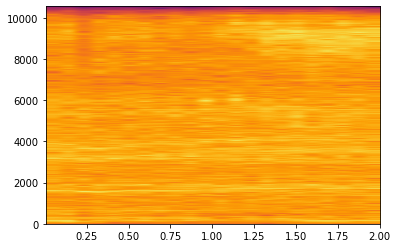

<Figure size 432x288 with 0 Axes>

In [ ]:
cmap = plt.get_cmap('inferno')
plt.specgram(nc_audio[6], NFFT=2048, Fs=21100, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
plt.dpi = 300
plt.show()
plt.savefig('/spec/spec/0.jpg')

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_axes.py:7592: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


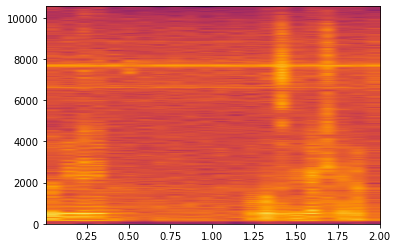

In [ ]:
for i in range(0,len(c_audio)):
  #print(i)
  cmap = plt.get_cmap('inferno')
  plt.specgram(c_audio[i], NFFT=2048, Fs=21100, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
  #plt.show()
  plt.dpi = 300
  plt.savefig('/spec/spec/cough/'+str(i+1)+'.jpg')

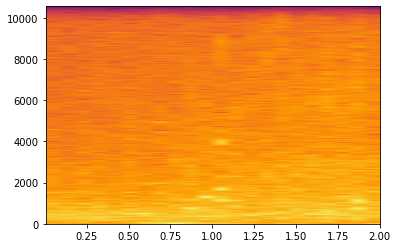

In [ ]:
for i in range(0,len(nc_audio)):
  cmap = plt.get_cmap('inferno')
  plt.specgram(nc_audio[i], NFFT=2048, Fs=21100, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB')
  #plt.show()
  plt.dpi = 300
  plt.savefig('/spec/spec/n_cough/'+str(i)+'.jpg')

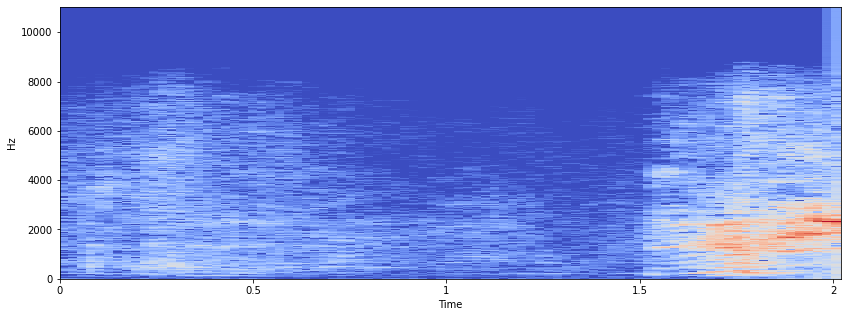

In [ ]:
X = librosa.stft(c_audio[0])
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(
                  '/spec/spec',
                  target_size = (300,300),
                  batch_size =8,
                  class_mode = 'binary'
)

Found 92 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from keras.utils.vis_utils import plot_model

In [ ]:
model = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(16,(3,3), activation = "relu", input_shape = (300,300,3)),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv
     tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
     tf.keras.layers.MaxPooling2D(2,2),
     #conv3
     #tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     #tf.keras.layers.MaxPooling2D(2,2),
     #conv4
     #tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     #tf.keras.layers.MaxPooling2D(2,2),
     #conv5
     #tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
     #tf.keras.layers.MaxPooling2D(2,2),
     #flatten
     tf.keras.layers.Flatten(),
     #dense
     tf.keras.layers.Dense(64,activation= "relu"),
     #Dropout
     tf.keras.layers.Dropout(0.05),
     #output
     tf.keras.layers.Dense(1,activation = 'sigmoid')
])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 170528)            0         
_________________________________________________________________
dense_20 (Dense)             (None, 64)                10913856  
_________________________________________________________________
dropout_10 (Dropout)         (None, 64)              

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(lr = 0.0006),
              metrics = ['acc']
              )

In [ ]:
#import shutil

#os.listdir("/content/spec")

In [ ]:
#shutil.rmtree("/content/spec/.ipynb_checkpoints")
#shutil.rmtree("/content/spec/0.jpg")

In [ ]:
history = model.fit(
    train_generator,
    epochs = 10,
    steps_per_epoch = 12,
    verbose = 1,
    #validation_data = test_generator
)

Epoch 1/10
12/12 [==============================] - 8s 562ms/step - loss: 8.1533 - acc: 0.5669
Epoch 2/10
12/12 [==============================] - 7s 560ms/step - loss: 0.5977 - acc: 0.7037
Epoch 3/10
12/12 [==============================] - 7s 558ms/step - loss: 0.6201 - acc: 0.7490
Epoch 4/10
12/12 [==============================] - 7s 564ms/step - loss: 0.4554 - acc: 0.8049
Epoch 5/10
12/12 [==============================] - 7s 560ms/step - loss: 0.7166 - acc: 0.7967
Epoch 6/10
12/12 [==============================] - 7s 564ms/step - loss: 0.4806 - acc: 0.8614
Epoch 7/10
12/12 [==============================] - 7s 598ms/step - loss: 0.3691 - acc: 0.8803
Epoch 8/10
12/12 [==============================] - 7s 557ms/step - loss: 0.3733 - acc: 0.8679
Epoch 9/10
12/12 [==============================] - 7s 560ms/step - loss: 0.3510 - acc: 0.9308
Epoch 10/10
12/12 [==============================] - 7s 554ms/step - loss: 0.2195 - acc: 0.9063
